# Imports

In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns

# Data

**Pfizer**: Over 43,000 participants got the two doses of the vaccine or placebo. The same number of subjects was assigned to the treatment and control group. An efficacy of 95% implies that among 170 confirmed cases of COVID-19, 8 of them observed in the vaccine group.

**Moderna**: The vaccine is being tested in 30,000 people. Half received two doses of the vaccine, and half received a placebo. Of the 95 cases of covid-19, 90 were in the group that received the placebo.

**AstraZeneca regimen 1**: Regimen 1(first a half dose and at least a month later a full dose) with 2741 participants showed 90% efficacy implies that among 37 confirmed cases of COVID-19, 3 of them observed in the vaccine group.

**AstraZeneca regimen 2**: Regimen 2 (two full doses at least one month apart) with 8896 participants showed 62% efficacy implies that among 94 confirmed cases of COVID-19, 26 of them observed in the vaccine group.

In [2]:
n_Pfizer_total = 170
n_Pfizer_vaccine = 8
n_Pfizer_placebo = n_Pfizer_total - n_Pfizer_vaccine
Pfizer_outcomes = np.concatenate([np.zeros(n_Pfizer_vaccine), np.ones(n_Pfizer_placebo)])

n_Moderna_total = 95
n_Moderna_vaccine = 5
n_Moderna_placebo = n_Moderna_total - n_Moderna_vaccine
Moderna_outcomes = np.concatenate([np.zeros(n_Moderna_vaccine), np.ones(n_Moderna_placebo)])

n_AstraZeneca_1_total = 37
n_AstraZeneca_1_vaccine = 3
n_AstraZeneca_1_placebo = n_AstraZeneca_1_total - n_AstraZeneca_1_vaccine
AstraZeneca_1_outcomes = np.concatenate([np.zeros(n_AstraZeneca_1_vaccine), np.ones(n_AstraZeneca_1_placebo)])

n_AstraZeneca_2_total = 94
n_AstraZeneca_2_vaccine = 26
n_AstraZeneca_2_placebo = n_AstraZeneca_2_total - n_AstraZeneca_2_vaccine
AstraZeneca_2_outcomes = np.concatenate([np.zeros(n_AstraZeneca_2_vaccine), np.ones(n_AstraZeneca_2_placebo)])

In [3]:
Pfizer_outcomes

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [4]:
Moderna_outcomes

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# The Model

Because our variables should be between 0 and 1,we’ll use a *beta distribution* for the priors and a *Bernoulli distribution* for the likelihood. To start, we assume that we do not know anything about how many participants caught the COVID in each group. So we choose the parameters of the beta distribution a uniform distribution. After we see the observed data, the distribution will change accordingly.

In [5]:
with pm.Model() as model:
    
    p_Pfizer = pm.Beta('p_Pfizer', alpha=1, beta=1)
    p_Moderna = pm.Beta('p_Moderna', alpha=1, beta=1)
    p_regimen1 = pm.Beta('p_regimen1', alpha=1, beta=1)
    p_regimen2 = pm.Beta('p_regimen2', alpha=1, beta=1)
    
    like_Pfizer = pm.Bernoulli('like_Pfizer', p=p_Pfizer, observed=Pfizer_outcomes)
    like_Moderna = pm.Bernoulli('like_Moderna', p=p_Moderna, observed=Moderna_outcomes)
    like_regimen1 = pm.Bernoulli('like_regimen1', p=p_regimen1, observed=AstraZeneca_1_outcomes)
    like_regimen2 = pm.Bernoulli('like_regimen2', p=p_regimen2, observed=AstraZeneca_2_outcomes)
    
    trace = pm.sample(draws=50000, step=pm.Metropolis(), initvals=pm.find_MAP(), progressbar=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_Pfizer]
>Metropolis: [p_Moderna]
>Metropolis: [p_regimen1]
>Metropolis: [p_regimen2]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 174 seconds.


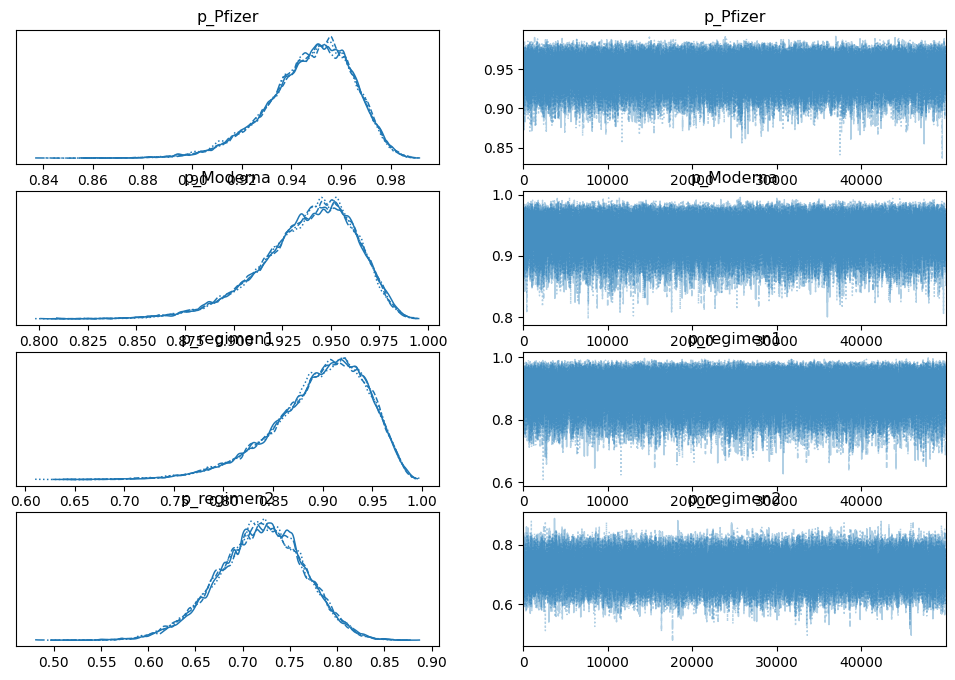

In [6]:
az.plot_trace(trace);

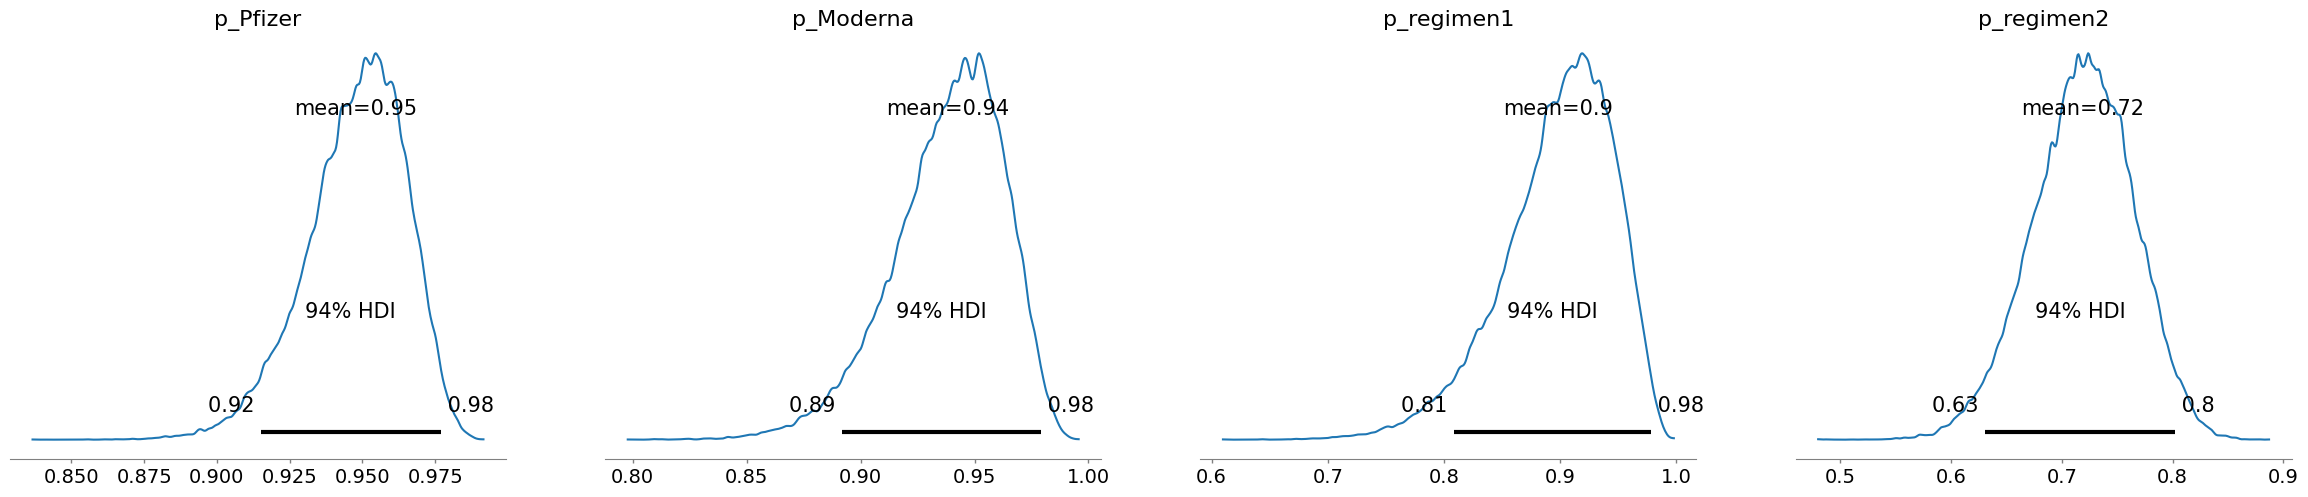

In [7]:
az.plot_posterior(trace);

In [8]:
trace.posterior.data_vars.variables['p_regimen2'].values[0]

array([0.73421632, 0.73421632, 0.73421632, ..., 0.75871325, 0.69806353,
       0.69806353])

In [9]:
trace_df = pd.DataFrame(
    {'p_Pfizer': trace.posterior.data_vars.variables['p_Pfizer'].values[0],
    'p_Moderna': trace.posterior.data_vars.variables['p_Moderna'].values[0],
    'p_regimen1': trace.posterior.data_vars.variables['p_regimen1'].values[0],
    'p_regimen2': trace.posterior.data_vars.variables['p_regimen2'].values[0]}
)

In [10]:
trace_df = pd.melt(trace_df)
trace_df.head()

,variable,value
0,p_Pfizer,0.936650
1,p_Pfizer,0.936650
2,p_Pfizer,0.975754
3,p_Pfizer,0.961397
4,p_Pfizer,0.951674


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


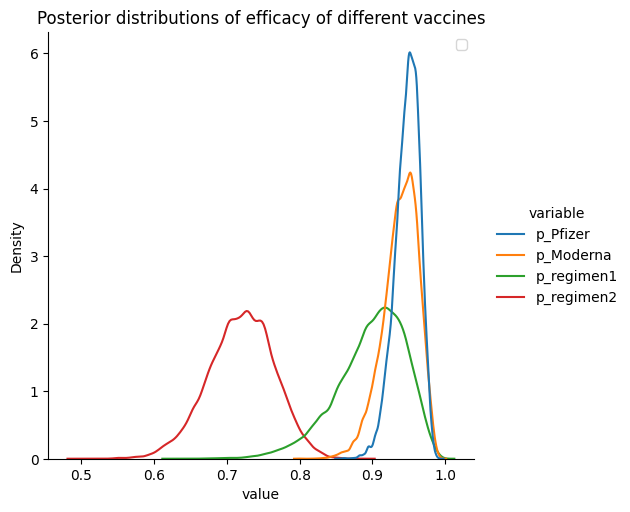

In [11]:
sns.displot(data=trace_df, x='value', hue='variable', kind='kde')

plt.title("Posterior distributions of efficacy of different vaccines")
plt.legend()
plt.show();

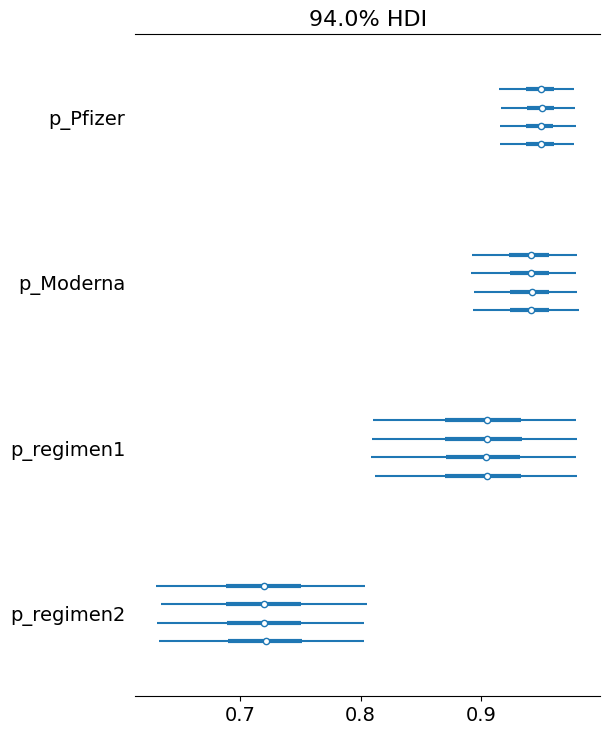

In [12]:
az.plot_forest(trace, var_names=['p_Pfizer', 'p_Moderna', 'p_regimen1', 'p_regimen2']);

# Comparison between Vaccines

### 1. Is Pfizer’s vaccine always better than Moderna’s? We will create two variables that will contain the “difference” and the “relation” between the variations.

In [13]:
with pm.Model() as model_1:
    
    p_Pfizer = pm.Beta('p_Pfizer', alpha=1, beta=1)
    p_Moderna = pm.Beta('p_Moderna', alpha=1, beta=1)
    
    like_Pfizer = pm.Bernoulli('like_Pfizer', p=p_Pfizer, observed=Pfizer_outcomes)
    like_Moderna = pm.Bernoulli('like_Moderna', p=p_Moderna, observed=Moderna_outcomes)
    
    pm.Deterministic('difference', p_Pfizer-p_Moderna)
    pm.Deterministic('relation', (p_Pfizer/p_Moderna)-1)
    
    trace_1 = pm.sample(draws=50000, step=pm.Metropolis(), initvals=pm.find_MAP(), progressbar=True)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_Pfizer]
>Metropolis: [p_Moderna]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 149 seconds.


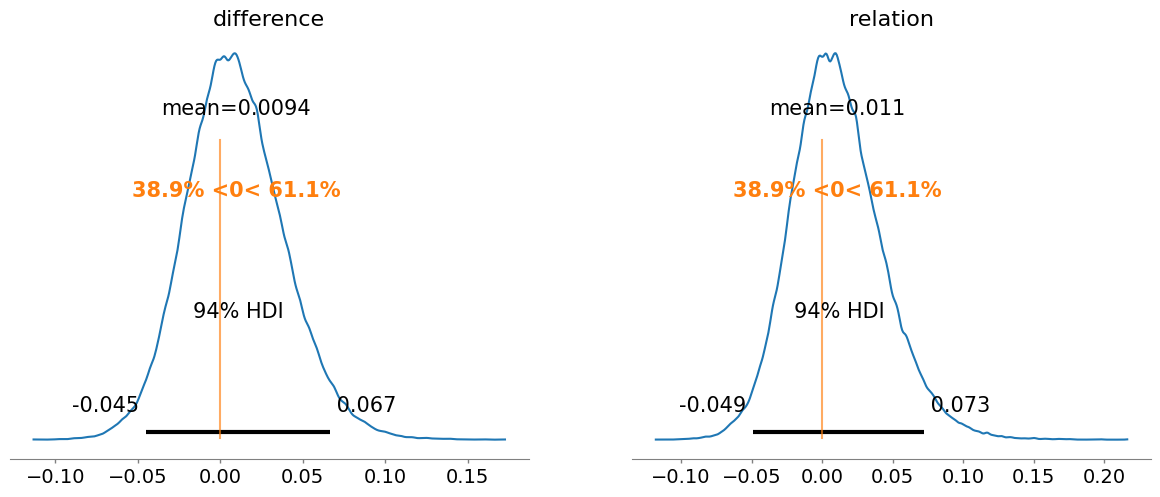

In [14]:
_ = pm.plot_posterior(trace_1, var_names=['difference', 'relation'], ref_val=0);

In [15]:
diffs_1 = trace_1.posterior.data_vars['difference'][0]
100*len(diffs_1[diffs_1>0])*1.0/len(diffs_1)

60.956

We can say that the difference in effectiveness of these two vaccines, with 61% of the posterior probability are greater than zero. We can not rule out a difference of zero, which suggests these two vaccines are not credibly different.

### 2. Is AstraZeneca regimen 1 always better than AstraZeneca regimen 2?

In [16]:
with pm.Model() as model_2:
    
    p_regimen1 = pm.Beta('p_regimen1', alpha=1, beta=1)
    p_regimen2 = pm.Beta('p_regimen2', alpha=1, beta=1)
    
    like_regimen1 = pm.Bernoulli('like_regimen1', p=p_regimen1, observed=AstraZeneca_1_outcomes)
    like_regimen2 = pm.Bernoulli('like_regimen2', p=p_regimen2, observed=AstraZeneca_2_outcomes)
    
    pm.Deterministic('difference', p_regimen1-p_regimen2)
    pm.Deterministic('relation', (p_regimen1/p_regimen2)-1)
    
    trace_2 = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)

C:\Users\johnw\AppData\Local\Temp\ipykernel_22888\1964773575.py:12: FutureWarning: The `start` kwarg was renamed to `initvals` and can now do more. Please check the docstring.
  trace_2 = pm.sample(draws=50000, step=pm.Metropolis(), start=pm.find_MAP(), progressbar=True)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_regimen1]
>Metropolis: [p_regimen2]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 143 seconds.


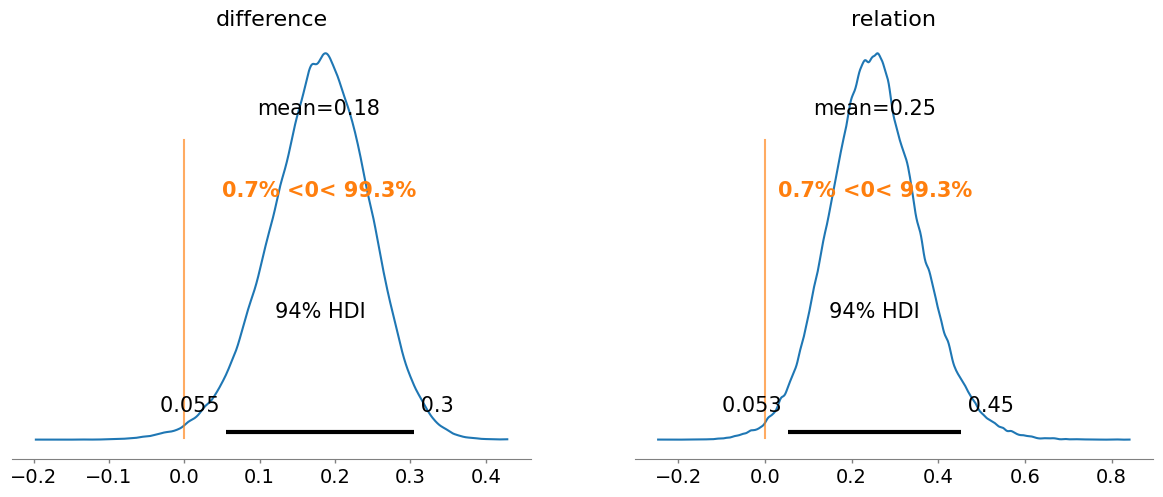

In [17]:
_ = pm.plot_posterior(trace_2, var_names=['difference', 'relation'], ref_val=0);

In [18]:
diffs_2 = trace_2.posterior.data_vars['difference'][0]
100*len(diffs_2[diffs_2>0])*1.0/len(diffs_2)

99.34

According to the available data, we have 99% confidence that regimen 1 is more effective than regimen 2.

In [19]:
100*len(diffs_2[diffs_2>0.06])*1.0/len(diffs_2)

95.72

There is 95.792% probability that regimen 1 is more effective than regimen 2 by 6%.

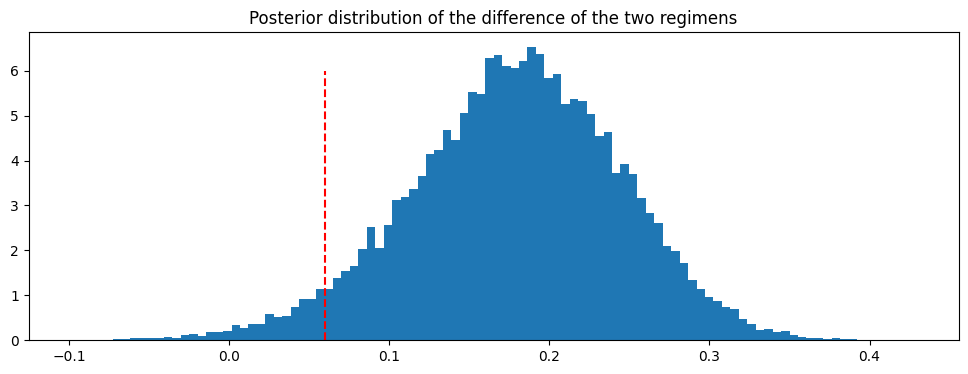

In [20]:
plt.figure(figsize=(12,4))
plt.hist(diffs_2, bins=100, density=True)
plt.vlines(0.06, 0, 6, linestyle='--', color='red')
plt.title('Posterior distribution of the difference of the two regimens')
plt.show();